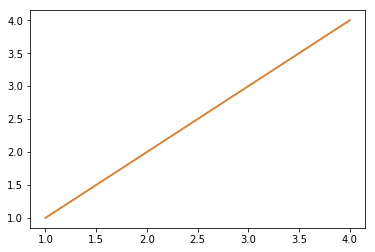

In [2]:
# plot test
import pylab
pylab.plot([1,2,3,4], [1,2,3,4])
pylab.show()

In [14]:
# STEPS
import steps.model as smodel
mdl = smodel.Model()
print mdl
steps.__version__

<steps.model.Model; proxy of <Swig Object of type 'steps::model::Model *' at 0x7fd4d86de870> >


'3.0.2'

In [10]:
# NEURON
from neuron import h
h("create soma")
h.soma

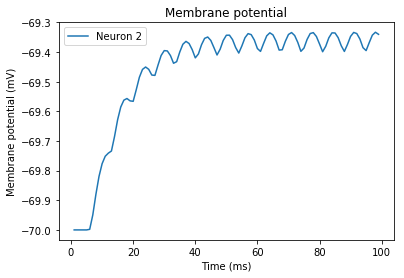

In [1]:
# NEST
import pylab
     
import nest
import nest.voltage_trace
     
weight = 20.0
delay = 1.0
stim = 1000.0
     
neuron1 = nest.Create("iaf_psc_alpha")
neuron2 = nest.Create("iaf_psc_alpha")
voltmeter = nest.Create("voltmeter")
     
nest.SetStatus(neuron1, {"I_e": stim})
nest.Connect(neuron1, neuron2, syn_spec={'weight': weight, 'delay': delay})
nest.Connect(voltmeter, neuron2)
     
nest.Simulate(100.0)
 
nest.voltage_trace.from_device(voltmeter)
nest.voltage_trace.show()

In [ ]:
# Brian2
# tutorial notebooks in brian directory

In [9]:
from nrnutils import Mechanism, Section

class SimpleNeuron(object):

    def __init__(self, **parameters):
        hh = Mechanism('hh', gl=parameters['g_leak'], el=-65,
                       gnabar=parameters['gnabar'], gkbar=parameters['gkbar'])
        self.soma = Section(L=30, diam=30, mechanisms=[hh])
        self.soma.add_synapse('ampa', 'Exp2Syn', e=0.0, tau1=0.1, tau2=5.0)

        # needed for PyNN
        self.source_section = self.soma
        self.source = self.soma(0.5)._ref_v
        self.parameter_names = ('g_leak', 'gnabar', 'gkbar')
        self.traces = {}
        self.recording_time = False

    def _set_gnabar(self, value):
        for seg in self.soma:
            seg.hh.gnabar = value
    def _get_gnabar(self):
        return self.soma(0.5).hh.gnabar
    gnabar = property(fget=_get_gnabar, fset=_set_gnabar)

    # ... gkbar and g_leak properties defined similarly

    def memb_init(self):
        for seg in self.soma:
            seg.v = self.v_init
from pyNN.neuron import NativeCellType

class SimpleNeuronType(NativeCellType):
    default_parameters = {'g_leak': 0.0002, 'gkbar': 0.036, 'gnabar': 0.12}
    default_initial_values = {'v': -65.0}
    recordable = ['soma(0.5).v', 'soma(0.5).ina']
    units = {'soma(0.5).v' : 'mV', 'soma(0.5).ina': 'nA'}
    receptor_types = ['soma.ampa']
    model = SimpleNeuron
    
from pyNN.neuron import setup, run, Population, Projection, AllToAllConnector, StaticSynapse
setup()
p1 = Population(10, SimpleNeuronType(g_leak=0.0003))
p1.record('soma(0.5).ina')
syn = StaticSynapse(weight=0.01, delay=0.5)
prj = Projection(p1, p1, AllToAllConnector(), syn, receptor_type='soma.ampa')
run(100.0)
output = p1.get_data()

ImportError: No module named nrnutils